In [3]:
random_state = 1
test_size = 0.2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

pd.options.display.max_columns = 80

In [4]:
data = pd.read_csv('../data/Data_binary.csv')

In [5]:
# Séparation des features et de la target
X = data.drop('Label', axis=1)
y = data['Label']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

print(f"Taille de l'ensemble d'entraînement: {X_train.shape}")
print(f"Taille de l'ensemble de test: {X_test.shape}")

Taille de l'ensemble d'entraînement: (2016638, 70)
Taille de l'ensemble de test: (504160, 70)


In [6]:
rf = RandomForestClassifier(random_state=random_state,n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(rf.score(X_test, y_test))
print(f1_score(y_test, y_pred))

0.9985758489368455
0.995777960719746


In [7]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [8]:
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30, None],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    }

rf_model = RandomForestClassifier(random_state=random_state)

# Configurer GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=4,
    n_jobs=-1,
    verbose=3,
    scoring='accuracy'
)

# Entraîner le modèle avec GridSearchCV
print("Début du Grid Search pour Random Forest...")
grid_search_rf.fit(X_train, y_train)

Début du Grid Search pour Random Forest...
Fitting 4 folds for each of 12 candidates, totalling 48 fits


[CV 3/4] END ....max_depth=10, n_estimators=100;, score=0.996 total time= 7.6min
[CV 1/4] END ....max_depth=10, n_estimators=100;, score=0.996 total time= 7.6min
[CV 4/4] END ....max_depth=10, n_estimators=100;, score=0.996 total time= 7.7min
[CV 2/4] END ....max_depth=10, n_estimators=100;, score=0.996 total time= 7.8min
[CV 2/4] END ....max_depth=30, n_estimators=100;, score=0.999 total time=10.4min
[CV 2/4] END ....max_depth=20, n_estimators=100;, score=0.999 total time=10.7min
[CV 3/4] END ....max_depth=20, n_estimators=100;, score=0.999 total time=10.7min
[CV 4/4] END ....max_depth=30, n_estimators=100;, score=0.999 total time=10.8min
[CV 4/4] END ....max_depth=20, n_estimators=100;, score=0.999 total time=10.8min
[CV 1/4] END ....max_depth=20, n_estimators=100;, score=0.999 total time=10.9min
[CV 3/4] END ....max_depth=30, n_estimators=100;, score=0.999 total time=11.1min
[CV 1/4] END ....max_depth=30, n_estimators=100;, score=0.999 total time=11.2min
[CV 1/4] END ....max_depth=1

,estimator,RandomForestC...andom_state=1)
,param_grid,"{'max_depth': [10, 20, ...], 'n_estimators': [100, 150, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,4
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200



Meilleurs paramètres: {'max_depth': 20, 'n_estimators': 200}
Meilleur score CV: 0.9988


0.9964010585122023

Accuracy sur l'ensemble de test: 0.9988

Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419095
           1       1.00      1.00      1.00     85065

    accuracy                           1.00    504160
   macro avg       1.00      1.00      1.00    504160
weighted avg       1.00      1.00      1.00    504160



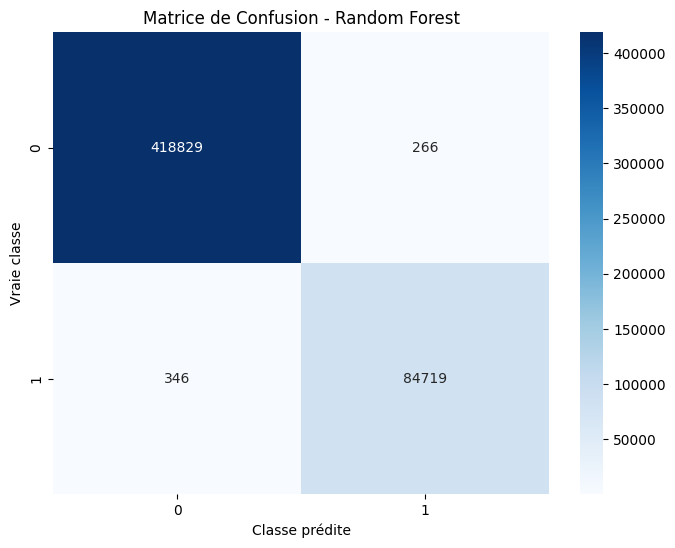

In [18]:
import seaborn as sns
# Afficher les meilleurs paramètres
print("\nMeilleurs paramètres:", grid_search_rf.best_params_)
print(f"Meilleur score CV: {grid_search_rf.best_score_:.4f}")

# Prédictions avec le meilleur modèle
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)

print(f1_score(y_pred_rf,y_test))

# Évaluation
print(f"\nAccuracy sur l'ensemble de test: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nRapport de classification:")
print(classification_report(y_test, y_pred_rf))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion - Random Forest')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.show()

In [13]:
best_rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
import joblib

best_rf_model = grid_search_rf.best_estimator_
joblib.dump(best_rf_model, '../models/best_random_forest_model.joblib')

['../models/best_random_forest_model.joblib']

In [17]:
print("Modèle enregistré avec succès dans '../models/best_random_forest_model.joblib'")
print(f"Paramètres du modèle enregistré: {best_rf_model.get_params()}")

Modèle enregistré avec succès dans '../models/best_random_forest_model.joblib'
Paramètres du modèle enregistré: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
